In [11]:
# Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import math

from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import seaborn as sns

Delta Plot Year 2050

In [10]:
# ---- Read Capacity Data ----
report = pd.read_excel('cap.xlsx') # cap.xlsx is compiled mannually from cap.csv from all run folders
                                   # Anternatively can read into each cap.csv file
# Filter year
graph_data = pd.DataFrame(pd.pivot_table(data = report.loc[report.year == 2050], columns = 'tech', index = 'scenario', values = 'Capacity (GW)', aggfunc = 'sum', fill_value = 0))

# Don't want scenario to be index
graph_data.reset_index(inplace = True, drop = False)
# x-axis values
x_scens = graph_data.scenario.tolist()

# Read colors for technologies and put them into a dictionary
tech_styles = pd.read_csv('tech_styles.csv')
tech_styles_dict = tech_styles.set_index(tech_styles.order)['color'].to_dict()

graph_data

tech,scenario,Canada,battery_4,battery_8,beccs_mod,biopower,coal,coal-ccs_mod_upgrade,csp,distpv,...,lfill-gas,nuclear,nuclear-smr,o-g-s,pumped-hydro,smr,smr-ccs,upv,wind-ofs,wind-ons
0,Decarb,10.140655,221.876904,95.889102,14.020506,1.119993,0.594483,3.785656,0.0001,173.085545,...,3.2706,89.963000,8.889634,4.078690,64.782556,0.0,0.261686,1041.268954,67.983772,890.240982
1,Decarb (FC),10.140655,209.867833,53.534573,14.022959,1.119832,0.354901,6.467498,0.0001,173.085545,...,3.2706,89.985065,5.882435,4.599075,58.621571,0.0,0.752172,1044.243272,66.508019,894.834151
2,High Electrification,10.140655,196.192387,83.048680,14.028476,1.120411,0.000000,2.376200,0.0001,173.085545,...,3.2706,90.744364,11.565104,4.399888,49.292562,0.0,0.559829,1131.554700,90.272538,1336.586516
3,High Electrification (FC),10.140655,188.783878,52.700485,14.025671,1.119622,0.000000,2.636983,0.0001,173.085545,...,3.2706,91.210000,12.630342,2.530010,46.702394,0.0,1.287910,1109.883099,84.215595,1305.843449
4,High FC Costs,10.140655,221.876904,95.889102,14.020506,1.119993,0.594483,3.785656,0.0001,173.085545,...,3.2706,89.963000,8.889634,4.078690,64.782556,0.0,0.261686,1041.268954,67.983772,890.240982
5,High FC Costs (FC),10.140655,218.524809,63.093255,14.023300,1.119891,0.298659,6.119940,0.0001,173.085545,...,3.2706,89.963000,5.909566,4.649615,62.372391,0.0,0.604508,1056.516404,66.871102,885.743957
6,High RE Costs,10.140655,147.932123,10.028998,14.022344,1.120684,0.122603,18.101698,0.0001,134.250091,...,3.2706,91.980000,22.052125,4.003338,105.943083,0.0,0.226324,941.662987,63.345109,969.625640
7,High RE Costs (FC),10.140655,109.036712,1.587505,14.025213,1.120377,0.122603,19.287102,0.0001,134.250091,...,3.2706,91.980000,18.842614,3.788435,88.968436,0.0,0.752797,920.838785,60.190109,981.735879
8,Low FC Costs,10.140655,221.876904,95.889102,14.020506,1.119993,0.594483,3.785656,0.0001,173.085545,...,3.2706,89.963000,8.889634,4.078690,64.782556,0.0,0.261686,1041.268954,67.983772,890.240982
9,Low FC Costs (FC),10.140655,202.932318,45.576698,14.023303,1.119832,0.436486,6.679278,0.0001,173.085545,...,3.2706,90.605950,6.421417,4.130657,57.212813,0.0,0.846761,1034.963763,66.745382,903.237363


In [47]:
# ---- Data Organization -----
# Capitalize first letters, lumping tech groups, drop H2 production techs
graph_data['Nuclear'] = graph_data['nuclear'] + graph_data['nuclear-smr']
graph_data['Coal'] = graph_data['coal'] + graph_data['coal-ccs_mod_upgrade']
graph_data['Gas-CC'] = graph_data['gas-cc']
graph_data['Gas-CC CCS'] = graph_data['gas-cc-ccs_mod'] + graph_data['gas-cc-ccs_mod_upgrade']
graph_data['Gas-CT'] = graph_data['gas-ct']
graph_data['Oil/Gas'] = graph_data['o-g-s']
graph_data['Other RE'] = graph_data['hydro'] + graph_data['geothermal'] + graph_data['biopower'] + graph_data['lfill-gas']
graph_data['Fuel Cell'] = graph_data['fuel-cell']
graph_data['H2-CT'] =  graph_data['h2-ct_upgrade'] + graph_data['h2-ct']
graph_data['Onshore Wind'] = graph_data['wind-ons']
graph_data['Offshore Wind'] = graph_data['wind-ofs']
graph_data['Solar'] = graph_data['csp'] + graph_data['upv'] + graph_data['distpv']
graph_data['Storage'] = graph_data['battery_4'] + graph_data['battery_8'] + graph_data['pumped-hydro'] 
#graph_data['SMR'] = graph_data['smr'] + graph_data['smr-ccs']
#graph_data['Electrolyzer'] = graph_data['electrolyzer']


graph_data=graph_data.drop(columns=['nuclear','nuclear-smr', 
                                    'coal','coal-ccs_mod_upgrade',
                                    'gas-cc','gas-cc-ccs_mod', 'gas-cc-ccs_mod_upgrade',
                                    'gas-ct', 'o-g-s', 'beccs_mod',
                                    'lfill-gas',
                                    'fuel-cell',
                                    'h2-ct_upgrade','h2-ct',
                                    'wind-ons', 'wind-ofs',
                                    'csp','upv','distpv',
                                    'hydro','geothermal','biopower',
                                    'electrolyzer', 'smr', 'smr-ccs',
                                    'battery_4','battery_8','pumped-hydro','Canada'])
graph_data

KeyError: 'nuclear'

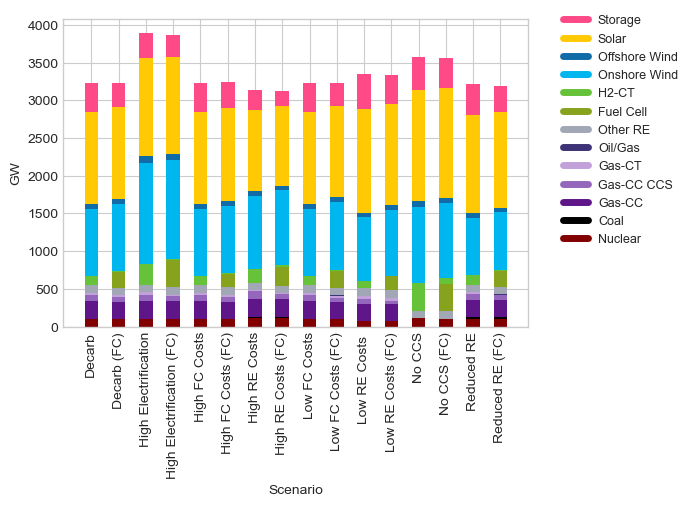

In [12]:
# Get technology list
y_categories = graph_data.columns.to_list()
y_categories.remove('scenario')

# Create list to track the stacking position for each bar
running_sums_pos = [0]*len(x_scens)
running_sums_neg = [0]*len(x_scens)
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(1,1, figsize = (6,4),  sharex = True ) # , layout = 'constrained'

# Loop through each technology 
for t in range(len(y_categories)):
    yvals = graph_data[y_categories[t]].tolist()
    bottoms = []
    # update stacking positions
    for i in range(len(yvals)):
        if yvals[i] >=0:
            bottoms.append(running_sums_pos[i])
            running_sums_pos[i]+=yvals[i]
        else:
            bottoms.append(running_sums_neg[i])
            running_sums_neg[i]+=yvals[i]
    # plot the technology for each scenario at the speficied stacking position
    axs.bar(x_scens,yvals, width = 0.5, bottom = bottoms, color = tech_styles_dict[y_categories[t]])


# Customize plot
axs.set_ylabel('GW')
axs.set_xlabel('Scenario')
plt.xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=90)

# Customize legend 
custom_lines = [Line2D([0], [0], color=tech_styles_dict[x], lw=5) for x in y_categories]
custom_lines.reverse() # want techs in leged the same roder as the stack
y_categories.reverse()
axs.legend(custom_lines, y_categories ,loc='upper left', bbox_to_anchor=(1.050,1.05), fontsize = 9)

Plot capacity by year. Exploded by scenarios.

In [12]:
# ---- Read Capacity Data ----
report = pd.read_excel('cap_fc.xlsx', sheet_name='All Scenarios') # This sheet has real 2023 data from EIA
graph_data = report[(report['year'] >= 2023) &                               # filter years
                    (report['scenario'].isin(['Decarb', 'Decarb (FC)']))]         # filter scenarios
graph_data = pd.DataFrame(pd.pivot_table(data = graph_data, columns = 'tech', index = ['scenario','year'], values = 'Capacity (GW)', aggfunc = 'sum', fill_value = 0))
graph_data.reset_index(inplace = True, drop = False)
graph_data['x_id'] = graph_data.scenario+'-'+graph_data.year.astype(str)
x_scens = graph_data.x_id.unique().tolist()

# Get colors for techs and put them into a dictionary
tech_styles = pd.read_csv('tech_styles.csv')
tech_styles_dict = tech_styles.set_index(tech_styles.order)['color'].to_dict()

graph_data

tech,scenario,year,Canada,battery_4,battery_8,beccs_mod,biopower,coal,coal-ccs_mod_upgrade,csp,...,nuclear,nuclear-smr,o-g-s,pumped-hydro,smr,smr-ccs,upv,wind-ofs,wind-ons,x_id
0,Decarb,2023,0.000000,16.524444,0.000000,0.000000,2.663301,185.250112,0.000000,1.4800,...,97.004603,0.000000,82.209134,23.052703,0.000000,0.000000,107.934124,0.171300,155.912300,Decarb-2023
1,Decarb,2026,9.408933,24.795858,0.000000,0.000000,2.796134,150.983336,0.000000,1.4800,...,98.142600,0.000000,60.950270,32.484646,0.000000,0.000000,265.366384,9.469000,373.884843,Decarb-2026
2,Decarb,2029,10.263691,41.275543,0.036135,0.000000,2.474134,129.579014,0.000000,1.4800,...,97.020600,0.000000,58.359670,39.849392,0.017978,0.000000,332.033184,21.067000,440.376455,Decarb-2029
3,Decarb,2032,10.668311,64.822019,1.440000,0.000000,2.008401,95.015561,3.620756,1.3920,...,95.902600,0.000000,49.595801,44.730093,0.022073,0.000000,474.940868,36.473000,586.746731,Decarb-2032
4,Decarb,2035,10.369802,112.492841,22.461799,13.962770,1.522101,0.000000,3.776304,1.3920,...,93.907600,0.000000,13.208370,61.009378,0.000000,0.038842,704.982035,47.081000,719.817074,Decarb-2035
5,Decarb,2038,10.228637,140.361536,33.762636,13.973800,1.357001,0.000000,3.776304,1.3920,...,92.660600,0.000000,10.964463,64.782556,0.000000,0.038842,806.769812,50.018811,795.359252,Decarb-2038
6,Decarb,2041,10.140655,156.412051,44.724833,13.980983,1.247101,0.000000,3.785656,1.3235,...,92.660600,8.889634,5.781016,64.782556,0.000000,0.172647,820.967186,59.551198,806.412327,Decarb-2041
7,Decarb,2044,10.140655,185.655593,55.233624,13.987019,1.162293,0.000000,3.785656,1.3235,...,92.660600,8.889634,5.619816,64.782556,0.000000,0.194088,884.010128,67.983772,838.613594,Decarb-2044
8,Decarb,2047,10.140655,210.807909,80.792158,14.001434,1.157293,0.096221,3.785656,0.0001,...,92.660600,8.889634,4.711654,64.782556,0.000000,0.247288,958.842456,67.983772,852.816103,Decarb-2047
9,Decarb,2050,10.140655,221.876904,95.889102,14.020506,1.119993,0.594483,3.785656,0.0001,...,89.963000,8.889634,4.078690,64.782556,0.000000,0.261686,1041.268954,67.983772,890.240982,Decarb-2050


In [13]:
# ---- Data Organization -----
# Capitalize first letters, lump techgroups, group H2 prodction techs
graph_data['Nuclear'] = graph_data['nuclear'] + graph_data['nuclear-smr']
graph_data['Coal'] = graph_data['coal'] + graph_data['coal-ccs_mod_upgrade']
graph_data['Gas-CC'] = graph_data['gas-cc']
graph_data['Gas-CC CCS'] = graph_data['gas-cc-ccs_mod'] + graph_data['gas-cc-ccs_mod_upgrade']
graph_data['Gas-CT'] = graph_data['gas-ct']
graph_data['Oil/Gas'] = graph_data['o-g-s']
graph_data['Other RE'] = graph_data['hydro'] + graph_data['geothermal'] + graph_data['biopower'] + graph_data['lfill-gas']
graph_data['Fuel Cell'] = graph_data['fuel-cell']
graph_data['H2-CT'] =  graph_data['h2-ct_upgrade'] + graph_data['h2-ct']
graph_data['Onshore Wind'] = graph_data['wind-ons']
graph_data['Offshore Wind'] = graph_data['wind-ofs']
graph_data['Solar'] = graph_data['csp'] + graph_data['upv'] + graph_data['distpv']
graph_data['Storage'] = graph_data['battery_4'] + graph_data['battery_8'] + graph_data['pumped-hydro'] 
#graph_data['SMR'] = graph_data['smr'] + graph_data['smr-ccs']
#graph_data['Electrolyzer'] = graph_data['electrolyzer']


graph_data=graph_data.drop(columns=['nuclear','nuclear-smr', 
                                    'coal','coal-ccs_mod_upgrade',
                                    'gas-cc','gas-cc-ccs_mod', 'gas-cc-ccs_mod_upgrade',
                                    'gas-ct', 'o-g-s', 'beccs_mod',
                                    'lfill-gas',
                                    'fuel-cell',
                                    'h2-ct_upgrade','h2-ct',
                                    'wind-ons', 'wind-ofs',
                                    'csp','upv','distpv',
                                    'hydro','geothermal','biopower',
                                    'electrolyzer', 'smr', 'smr-ccs',
                                    'battery_4','battery_8','pumped-hydro','Canada'])
graph_data

tech,scenario,year,x_id,Nuclear,Coal,Gas-CC,Gas-CC CCS,Gas-CT,Oil/Gas,Other RE,Fuel Cell,H2-CT,Onshore Wind,Offshore Wind,Solar,Storage
0,Decarb,2023,Decarb-2023,97.004603,185.250112,286.412717,0.000000,133.184401,82.209134,89.246400,0.000000,0.000000,155.912300,0.171300,116.118024,39.577147
1,Decarb,2026,Decarb-2026,98.142600,150.983336,287.128282,0.000000,126.603714,60.950270,93.353526,0.000000,0.000000,373.884843,9.469000,320.640202,57.280504
2,Decarb,2029,Decarb-2029,97.020600,129.579014,285.600071,0.000000,123.993134,58.359670,95.664822,0.000000,3.841001,440.376455,21.067000,417.458366,81.161070
3,Decarb,2032,Decarb-2032,95.902600,98.636317,281.675483,7.348748,121.000258,49.595801,96.203760,0.000000,3.841001,586.746731,36.473000,591.780504,110.992111
4,Decarb,2035,Decarb-2035,93.907600,3.776304,275.599431,11.436801,46.116130,13.208370,96.216839,0.000000,31.634642,719.817074,47.081000,837.348762,195.964017
5,Decarb,2038,Decarb-2038,92.660600,3.776304,274.903705,16.348062,43.869819,10.964463,96.327753,0.000000,35.109750,795.359252,50.018811,946.798448,238.906728
6,Decarb,2041,Decarb-2041,101.550234,3.785656,264.113005,31.425748,42.362279,5.781016,96.587150,0.000000,59.611025,806.412327,59.551198,968.221504,265.919440
7,Decarb,2044,Decarb-2044,101.550234,3.785656,261.182505,46.419362,35.909902,5.619816,97.835666,0.000000,74.691497,838.613594,67.983772,1039.356355,305.671773
8,Decarb,2047,Decarb-2047,101.550234,3.881877,240.870705,68.346579,29.586480,4.711654,98.091009,0.000000,91.130453,852.816103,67.983772,1121.612193,356.382622
9,Decarb,2050,Decarb-2050,98.852634,4.380139,234.573305,76.888121,29.000550,4.078690,98.224212,0.000000,121.744840,890.240982,67.983772,1214.354599,382.548562


ValueError: keyword fontsize is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

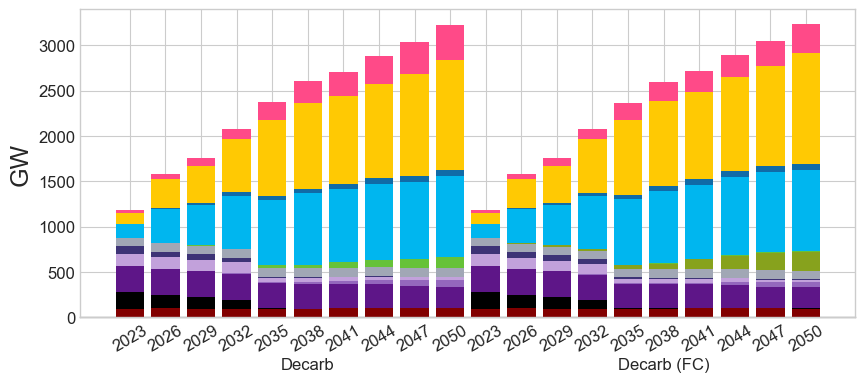

In [16]:
# ---- Plot Exploded by Scenarios ----
# Get tech list
y_categories = graph_data.columns.to_list()
y_categories = [y for y in y_categories if y not in ['scenario','year','x_id']]
#y_categories = [y for y in ['Fuel Cell','H2-CT']]  # Use this line instead of the above when need to single out technologies


# Initiate plotting
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(1,1, figsize = (10,4),  sharex = True ) # , layout = 'constrained'

# Create lists to track stacking positions
running_sums_pos = [0]*len(x_scens)
running_sums_neg = [0]*len(x_scens)

# Create list to drop techs with negligible values
tech_sums = []

# Loop through all techs
for t in range(len(y_categories)):
    yvals = graph_data[y_categories[t]].tolist()
    tech_sums.append(sum(yvals))
    bottoms = []
    # Update stacking positions
    for i in range(len(yvals)):
        if yvals[i] >=0:
            bottoms.append(running_sums_pos[i])
            running_sums_pos[i]+=yvals[i]
        else:
            bottoms.append(running_sums_neg[i])
            running_sums_neg[i]+=yvals[i]
    # Plot bar for that tech for each scenario
    axs.bar(x_scens,yvals, width = 0.8, bottom = bottoms, color = tech_styles_dict[y_categories[t]])


# Primary x-axis labels
yrs = [s.split('-')[1] for s in x_scens]
# Secondary x-axis labels
scen_types = [s.split('-')[0] for s in x_scens]
scen_types = list(set(scen_types))
scen_types = ['\n\n'+s for s in scen_types]
scen_types.reverse()

# Customize plot
plt.xticks(axs.get_xticks(), yrs, rotation=30, fontsize = 12)
plt.yticks(fontsize=12)
axs.set_ylabel('GW', fontsize = 18)
#axs.set_xlabel('Scenario')

# Set positions for secondary x-axis labels
yrs_per_s = len(yrs)/len(scen_types)
scen_locs = [yrs_per_s/2 + s*yrs_per_s for s in range(len(scen_types))]

sec = axs.secondary_xaxis(location=0)
sec.set_xticks(scen_locs, labels=scen_types, fontsize=12)
sec.tick_params('x', length=0)

sec2 = axs.secondary_xaxis(location=0)
linevalues = [x-0.5 for x in list(range(0,len(x_scens),math.floor(yrs_per_s)))]
sec2.set_xticks(linevalues, labels=[], fontsize=12)
sec2.tick_params('x', length=40, width=0.5)



# Loop through each tech and drop techs with negligible values
keep_tech = []
for t in range(len(tech_sums)):
    if abs(tech_sums[t]) > 0.5:
        keep_tech.append(y_categories[t])
tech_legend = tech_styles.loc[tech_styles.order.isin(keep_tech)]

# Customize the legend
custom_lines = [Line2D([0], [0], color=tech_styles_dict[x], lw=5) for x in y_categories]
custom_lines.reverse()
y_categories.reverse()
axs.legend(custom_lines, y_categories ,loc='upper left', bbox_to_anchor=(1.050,1.05), fontsize = 12)

# Add dividing line between scenarios
ymin = axs.get_ylim()[0]
ymax = axs.get_ylim()[1]
for x in linevalues:
    axs.vlines(x,ymin,ymax*1.1, colors='black')

# Set axis limits
axs.set_ylim(ymin,ymax)
axs.set_xlim(-0.5,len(yrs)-0.5)


Plot Absolute Generation for One Scenario build out by year

In [93]:
# ---- Read Capacity Data ----
tech_styles = pd.read_csv('cap_tech_style.csv')
tech_styles_dict = tech_styles.set_index(tech_styles.order)['color'].to_dict()
report = pd.read_excel('cap_decarb.xlsx')
graph_data = pd.DataFrame(pd.pivot_table(data = report.loc[report.year >= 2023], columns = 'tech', index = 'year', values = 'Capacity (GW)', aggfunc = 'sum', fill_value = 0))

graph_data

tech,Canada,battery_4,battery_8,beccs_mod,biopower,coal,coal-ccs_mod_upgrade,csp,distpv,electrolyzer,...,lfill-gas,nuclear,nuclear-smr,o-g-s,pumped-hydro,smr,smr-ccs,upv,wind-ofs,wind-ons
year,,,,,,,,,,,,,,,,,,,,,
2023,0.000000,16.524444,0.000000,0.000000,2.663301,187.480601,0.000000,1.4800,6.703900,0.000000,...,3.2126,97.004603,0.000000,82.209134,23.052703,0.000000,0.000000,107.934124,0.171300,155.912300
2026,9.408933,24.795858,0.000000,0.000000,2.796134,185.250112,0.000000,1.4800,53.793818,0.000000,...,3.3066,98.142600,0.000000,60.950270,32.484646,0.000000,0.000000,265.366384,9.469000,373.884843
2029,10.263691,41.275543,0.036135,0.000000,2.474134,129.579014,0.000000,1.4800,83.945182,0.000000,...,3.2706,97.020600,0.000000,58.359670,39.849392,0.017978,0.000000,332.033184,21.067000,440.376455
2032,10.668311,64.822019,1.440000,0.000000,2.008401,95.015561,3.620756,1.3920,115.447636,0.000000,...,3.2706,95.902600,0.000000,49.595801,44.730093,0.022073,0.000000,474.940868,36.473000,586.746731
2035,10.369802,112.492841,22.461799,13.962770,1.522101,0.000000,3.776304,1.3920,130.974727,10.520758,...,3.2706,93.907600,0.000000,13.208370,61.009378,0.000000,0.038842,704.982035,47.081000,719.817074
2038,10.228637,140.361536,33.762636,13.973800,1.357001,0.000000,3.776304,1.3920,138.636636,11.654376,...,3.2706,92.660600,0.000000,10.964463,64.782556,0.000000,0.038842,806.769812,50.018811,795.359252
2041,10.140655,156.412051,44.724833,13.980983,1.247101,0.000000,3.785656,1.3235,145.930818,18.066432,...,3.2706,92.660600,8.889634,5.781016,64.782556,0.000000,0.172647,820.967186,59.551198,806.412327
2044,10.140655,185.655593,55.233624,13.987019,1.162293,0.000000,3.785656,1.3235,154.022727,24.316137,...,3.2706,92.660600,8.889634,5.619816,64.782556,0.000000,0.194088,884.010128,67.983772,838.613594
2047,10.140655,210.807909,80.792158,14.001434,1.157293,0.096221,3.785656,0.0001,162.769636,28.871874,...,3.2706,92.660600,8.889634,4.711654,64.782556,0.000000,0.247288,958.842456,67.983772,852.816103


In [94]:
# ---- Data Organization -----
graph_data['Nuclear'] = graph_data['nuclear'] + graph_data['nuclear-smr']
graph_data['Coal'] = graph_data['coal'] + graph_data['coal-ccs_mod_upgrade']
graph_data['Gas-CC'] = graph_data['gas-cc']
graph_data['Gas-CC CCS'] = graph_data['gas-cc-ccs_mod'] #+graph_data['gas-cc-ccs_mod_upgrade']
graph_data['Gas-CT'] = graph_data['gas-ct']
graph_data['Oil/Gas'] = graph_data['o-g-s']
graph_data['Other RE'] = graph_data['hydro'] + graph_data['geothermal'] + graph_data['biopower'] + graph_data['lfill-gas']
#graph_data['Fuel Cell'] = graph_data['fuel-cell']
graph_data['H2-CT'] =  graph_data['h2-ct_upgrade'] + graph_data['h2-ct']
graph_data['Onshore Wind'] = graph_data['wind-ons']
graph_data['Offshore Wind'] = graph_data['wind-ofs']
graph_data['Solar'] = graph_data['csp'] + graph_data['upv'] + graph_data['distpv']
graph_data['Storage'] = graph_data['battery_4'] + graph_data['battery_8'] + graph_data['pumped-hydro'] 
#graph_data['SMR'] = graph_data['smr'] + graph_data['smr-ccs']
#graph_data['Electrolyzer'] = graph_data['electrolyzer']


graph_data=graph_data.drop(columns=['nuclear','nuclear-smr', 
                                    'coal','coal-ccs_mod_upgrade',
                                    'gas-cc','gas-cc-ccs_mod',#'gas-cc-ccs_mod_upgrade',
                                    'gas-ct', 'o-g-s', 'beccs_mod',
                                    'lfill-gas',
                                    #'fuel-cell',
                                    'h2-ct_upgrade','h2-ct',
                                    'wind-ons', 'wind-ofs',
                                    'csp','upv','distpv',
                                    'hydro','geothermal','biopower',
                                    'electrolyzer', 'smr', 'smr-ccs',
                                    'battery_4','battery_8','pumped-hydro','Canada'])
graph_data

tech,Nuclear,Coal,Gas-CC,Gas-CC CCS,Gas-CT,Oil/Gas,Other RE,H2-CT,Onshore Wind,Offshore Wind,Solar,Storage,SMR,Electrolyzer
year,,,,,,,,,,,,,,
2023,97.004603,187.480601,286.412717,0.000000,133.184401,82.209134,89.246400,0.000000,155.912300,0.171300,116.118024,39.577147,0.000000,0.000000
2026,98.142600,185.250112,287.128282,0.000000,126.603714,60.950270,93.353526,0.000000,373.884843,9.469000,320.640202,57.280504,0.000000,0.000000
2029,97.020600,129.579014,285.600071,0.000000,123.993134,58.359670,95.664822,3.841001,440.376455,21.067000,417.458366,81.161070,0.017978,0.000000
2032,95.902600,98.636317,281.675483,7.348748,121.000258,49.595801,96.203760,3.841001,586.746731,36.473000,591.780504,110.992111,0.022073,0.000000
2035,93.907600,3.776304,275.599431,11.436801,46.116130,13.208370,96.216839,31.634642,719.817074,47.081000,837.348762,195.964017,0.038842,10.520758
2038,92.660600,3.776304,274.903705,16.348062,43.869819,10.964463,96.327753,35.109750,795.359252,50.018811,946.798448,238.906728,0.038842,11.654376
2041,101.550234,3.785656,264.113005,31.425748,42.362279,5.781016,96.587150,59.611025,806.412327,59.551198,968.221504,265.919440,0.172647,18.066432
2044,101.550234,3.785656,261.182505,46.419362,35.909902,5.619816,97.835666,74.691497,838.613594,67.983772,1039.356355,305.671773,0.194088,24.316137
2047,101.550234,3.881877,240.870705,68.346579,29.586480,4.711654,98.091009,91.130453,852.816103,67.983772,1121.612193,356.382622,0.247288,28.871874


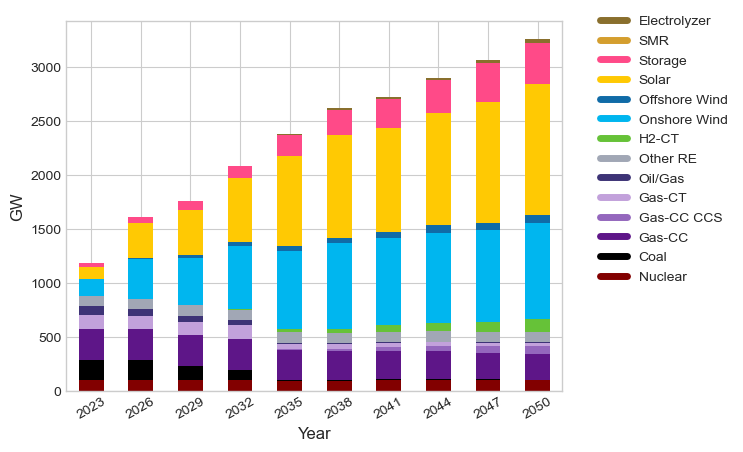

In [95]:
# Get tech list
y_categories = graph_data.columns.tolist()
y_categories.reverse()

# initiate plotting
plt.style.use('seaborn-v0_8-whitegrid')

# Plot stacked bar chart
fig = graph_data.plot.bar(stacked=True, color = tech_styles_dict)

# Customize plot
fig.set_ylabel('GW', fontsize = 12)
fig.set_xlabel('Year', fontsize = 12)
plt.xticks(rotation=30)

# Customize legend
custom_lines = [Line2D([0], [0], color=tech_styles_dict[x], lw=5) for x in y_categories]
fig.legend(custom_lines, y_categories ,loc='upper left', bbox_to_anchor=(1.050,1.05), fontsize = 10)

Plot SMR & Electrolyer (H2 Production tech) capacity

In [22]:
# ---- Read Capacity Data ----
tech_styles = pd.read_csv('tech_styles.csv')
tech_styles_dict = tech_styles.set_index(tech_styles.order)['color'].to_dict()
report = pd.read_excel('cap_all_smr&electrolyzer.xlsx',sheet_name='cap_new_out_Decarb')
graph_data = pd.DataFrame(pd.pivot_table(data = report.loc[report.scenario=='Decarb (FC)'], columns = 'tech', index = 'year', values = ['Capacity (GW)', 'ele_efficiency (kWh/kg)'], aggfunc = 'sum', fill_value = 0))

# Loop though techs to calculate Production_capacity = Energy_capacity/ele_efficiency (convert GW to metrid tons/day)
for tech in graph_data['Capacity (GW)'].columns.to_list():
    graph_data['Capacity (metric tons/day)', tech] = graph_data['Capacity (GW)', tech]/graph_data['ele_efficiency (kWh/kg)', tech] *1e6 *24 /1000

# Lump SMR techs
graph_data['Capacity (metric tons/day)','SMR'] = graph_data['Capacity (metric tons/day)','smr'] + graph_data['Capacity (metric tons/day)','smr-ccs']#graph_data.drop(('Capacity (metric tons/day)', 'SMR-CCS'), axis=1, inplace=True)
graph_data

Capacity (GW)                     ele_efficiency (kWh/kg)                \
tech  electrolyzer       smr   smr-ccs            electrolyzer   smr smr-ccs   
year                                                                           
2026      0.000000  0.030642  0.000000                  55.170  0.88     1.9   
2029      0.000000  0.021006  0.000000                  54.705  0.88     1.9   
2032      0.000000  0.016113  0.010302                  54.240  0.88     1.9   
2035      9.214691  0.000000  0.123902                  53.775  0.88     1.9   
2038      3.786985  0.000000  0.023083                  53.310  0.88     1.9   
2041      9.567462  0.000000  0.212871                  52.845  0.88     1.9   
2044      9.669510  0.000000  0.037554                  52.380  0.88     1.9   
2047      4.054293  0.000000  0.256441                  51.915  0.88     1.9   
2050      2.094291  0.000000  0.088019                  51.450  0.88     1.9   

     Capacity (metric tons/day)                           
tech               electrolyzer         smr      smr-ccs  
year                                                      
2026                   0.000000  835.684309     0.000000  
2029                   0.000000  572.888318     0.000000  
2032                   0.000000  439.455736   130.127318  
2035                4112.553817    0.000000  1565.079335  
2038                1704.888927    0.000000   291.572476  
2041                4345.143240    0.000000  2688.893343  
2044                4430.474398    0.000000   474.370787  
2047                1874.275865    0.000000  3239.258059  
2050                 976.928859    0.000000  1111.816080

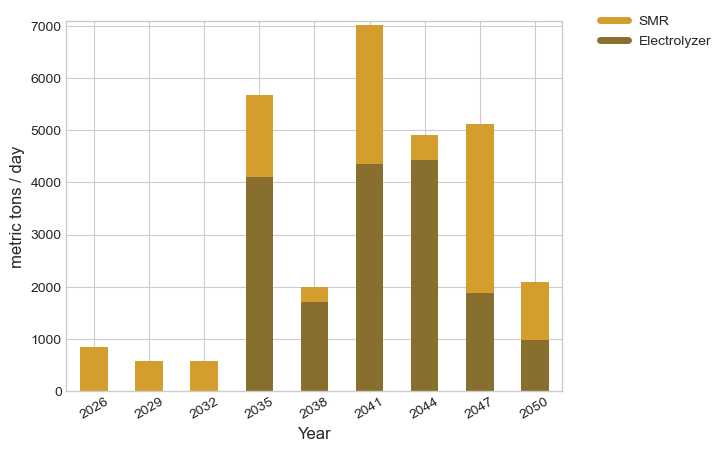

In [26]:
y_categories = graph_data['Capacity (metric tons/day)'].columns.tolist()
#for tech in y_categories:
#    if graph_data[tech].sum() < 0:
#        y_categories.remove(tech)
y_categories.reverse()
plt.style.use('seaborn-v0_8-whitegrid')

fig = graph_data['Capacity (metric tons/day)'].plot.bar(stacked=True, color = tech_styles_dict)
fig.set_ylabel('metric tons / day', fontsize = 12)
fig.set_xlabel('Year', fontsize = 12)
plt.ylim(0,7100)
plt.xticks(rotation=30)

custom_lines = [Line2D([0], [0], color=tech_styles_dict[x], lw=5) for x in y_categories]
fig.legend(custom_lines, y_categories ,loc='upper left', bbox_to_anchor=(1.050,1.05), fontsize = 10)
#fig.savefig('Differences.png',dpi=150, format='png')

Plot SMR & Electrolyzer (H2 production) capacity build by year. Exploded by scenarios.

In [24]:
# ---- Read Capacity Data ----
# Get tech colors and put them into a dictionary
tech_styles = pd.read_csv('tech_styles.csv')
tech_styles_dict = tech_styles.set_index(tech_styles.order)['color'].to_dict()

# Read and filter data
report = pd.read_excel('cap_all_smr&electrolyzer.xlsx',sheet_name='cap_new_out_Decarb')
graph_data = report[(report['year'] >= 2023) &                               # filter years
                    (report['scenario'].isin(['Decarb', 'Decarb (FC)']))]    # filter scenarios
# Conver capacity to GW
graph_data['Capacity (metric tons/day)'] = graph_data['Capacity (GW)']/graph_data['ele_efficiency (kWh/kg)'] *1e6 *24 /1000
# Get scenario list
graph_data['x_id'] = graph_data.scenario+'-'+graph_data.year.astype(str)
x_scens = graph_data.x_id.unique().tolist()

graph_data = pd.DataFrame(pd.pivot_table(data = graph_data, columns = 'tech', index = ['scenario','year'], values = 'Capacity (metric tons/day)', aggfunc = 'sum', fill_value = 0))

# Data organization, capitalize first letter, lump tech groups
graph_data['Electrolyzer'] = graph_data['electrolyzer']
graph_data['SMR'] = graph_data['smr'] + graph_data['smr-ccs']
graph_data = graph_data.drop(columns=['electrolyzer','smr','smr-ccs'])

graph_data

tech              Electrolyzer          SMR
scenario    year                           
Decarb      2026      0.000000     0.000000
            2029      0.000000   490.303500
            2032      0.000000   111.676718
            2035   4695.456897   490.635827
            2038    510.476373     0.000000
            2041   2912.088669  1690.169520
            2044   2863.553483   270.838396
            2047   2106.090263   671.991208
            2050   5404.241924   181.873137
Decarb (FC) 2026      0.000000   835.684309
            2029      0.000000   572.888318
            2032      0.000000   569.583054
            2035   4112.553817  1565.079335
            2038   1704.888927   291.572476
            2041   4345.143240  2688.893343
            2044   4430.474398   474.370787
            2047   1874.275865  3239.258059
            2050    976.928859  1111.816080

(0.0, 7385.738412041591)

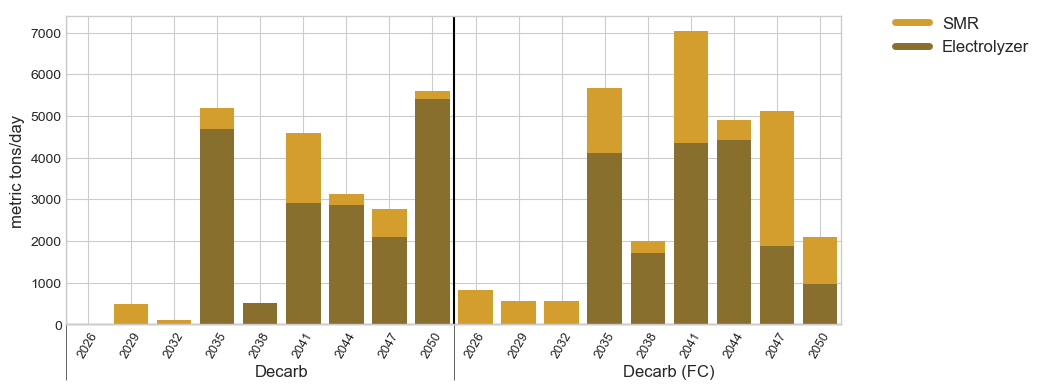

In [25]:
# ---- Plot Exploded by Scenarios ----
y_categories = graph_data.columns.to_list()
y_categories = [y for y in y_categories if y not in ['scenario','year','x_id']]


# Initiate plotting
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(1,1, figsize = (10,4),  sharex = True ) # , layout = 'constrained'

# Create list to track stacking positions
running_sums_pos = [0]*len(x_scens)
running_sums_neg = [0]*len(x_scens)

# Loop through techs
for t in range(len(y_categories)):
    yvals = graph_data[y_categories[t]].tolist()
    bottoms = []
    # Update stacking positions
    for i in range(len(yvals)):
        if yvals[i] >=0:
            bottoms.append(running_sums_pos[i])
            running_sums_pos[i]+=yvals[i]
        else:
            bottoms.append(running_sums_neg[i])
            running_sums_neg[i]+=yvals[i]
            # Plot the tech for each scenario
    axs.bar(x_scens,yvals, width = 0.8, bottom = bottoms, color = tech_styles_dict[y_categories[t]])

# Get x-axis labels
yrs = [s.split('-')[1] for s in x_scens]
# Get y-acis labels
scen_types = [s.split('-')[0] for s in x_scens]
scen_types = list(set(scen_types))
scen_types = ['\n\n'+s for s in scen_types]
scen_types.reverse()

# Customize plot
plt.xticks(axs.get_xticks(), yrs, rotation=60, fontsize = 9)
axs.set_ylabel('metric tons/day', fontsize = 12)
#axs.set_xlabel('Scenario')
#plt.title(label='Absolute USA Generation: FC')

# Set secondary x labels' postions
yrs_per_s = len(yrs)/len(scen_types)
scen_locs = [yrs_per_s/2 + s*yrs_per_s for s in range(len(scen_types))]

sec = axs.secondary_xaxis(location=0)
sec.set_xticks(scen_locs, labels=scen_types, fontsize=12)
sec.tick_params('x', length=0)

sec2 = axs.secondary_xaxis(location=0)
linevalues = [x-0.5 for x in list(range(0,len(x_scens),math.floor(yrs_per_s)))]
sec2.set_xticks(linevalues, labels=[])
sec2.tick_params('x', length=40, width=0.5)


# Customize legend
custom_lines = [Line2D([0], [0], color=tech_styles_dict[x], lw=5) for x in y_categories]
custom_lines.reverse()
y_categories.reverse()
axs.legend(custom_lines, y_categories ,loc='upper left', bbox_to_anchor=(1.050,1.05), fontsize = 12)

# Add dividing line between scenarios
ymin = axs.get_ylim()[0]
ymax = axs.get_ylim()[1]
for x in linevalues:
    axs.vlines(x,ymin,ymax*1.1, colors='black')

# Set axes limits
axs.set_xlim(-0.5,len(yrs)-0.5)
axs.set_ylim(ymin,ymax)


Plot Fuel Cells capacity by year for all scenarios

In [2]:
# ---- Read Capacity Data ----
report = pd.read_excel('cap_fc.xlsx')

# Filter data
graph_data = report[(report['year'] >= 2023) &                               # filter years
                    (report['tech'].isin(['fuel-cell']))]                   # filter techs
graph_data = pd.DataFrame(pd.pivot_table(data = graph_data, columns = 'scenario', index = 'year', values = 'Capacity (GW)', aggfunc = 'sum', fill_value = 0))

graph_data

scenario,BAU (FC),Decarb (FC),High Electrification (FC),High FC Costs (FC),High RE Costs (FC),Low FC Costs (FC),Low RE Costs (FC),No CCS (FC),Reduced RE (FC)
year,,,,,,,,,
2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2026,0.000000,9.739242,9.697896,9.734249,14.980895,9.739242,6.161589,9.739242,10.589373
2029,0.036820,15.965942,18.022410,15.242941,26.991782,16.564081,10.466673,15.965942,18.686769
2032,17.380831,18.986183,22.990236,15.488080,28.034942,19.710883,15.854791,20.622339,18.742231
2035,19.860445,38.021650,73.172323,25.637713,31.921429,46.312651,28.930038,224.438319,35.452797
2038,25.407015,55.828132,119.391030,36.820524,52.589186,65.590333,38.473121,247.220155,49.847977
2041,45.320008,109.566406,214.962944,88.290949,107.919518,121.084873,89.808040,288.424856,102.442641
2044,63.420280,143.625732,282.067311,118.172634,148.116097,158.217297,129.150637,325.351128,136.084648
2047,124.953495,191.806223,332.182251,156.367975,204.614031,209.883352,170.269757,350.208844,182.731800


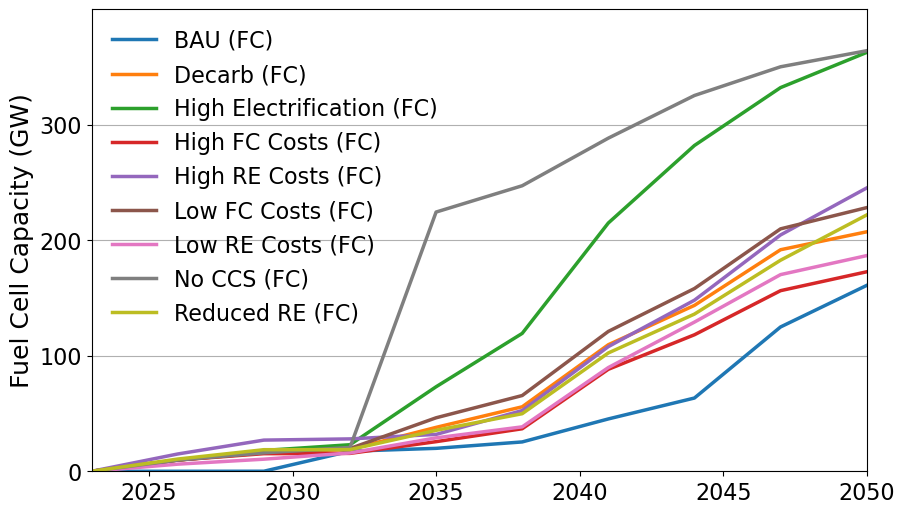

In [9]:
# Plotting each scenario

# Initiate plotting
plt.figure(figsize=(10, 6))

# Plot data trends
for scenario in graph_data.columns:
    plt.plot(graph_data.index, graph_data[scenario], linestyle='-', linewidth=2.5, label=scenario)

# Adding labels and title
#plt.xlabel('Year',fontsize=14)
plt.ylabel('Fuel Cell Capacity (GW)',fontsize=18)
plt.legend( fontsize = 16, frameon=False)
plt.xticks(fontsize=16)
plt.yticks(np.arange(0,400,100), fontsize=16)
plt.xlim(2023,2050)
plt.ylim(0,400)
plt.grid(axis='y')